### Central Limit Theorem

From wiki (https://en.wikipedia.org/wiki/Central_limit_theorem):
> In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a bell curve) even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

Let's implement a general function to test the central limit theorem:

In [2]:
def clt(dist, dist_params, n_dist=1, n_samples=1000):
    X = np.empty(shape=(n_samples))
    for i in range(n_samples):
        random_sample = dist(dist_params[0], dist_params[1], size=n_dist)
        X[i] = np.mean(random_sample)
    return X

where we need to provide the number of distributions `n_dist`, the number of samples `n_samples`, the distribution to sample from `dist` (this should be a function), and the distribution parameters `dist_params` specific to the studied probability distribution.

As an example we take the beta distribution (`stats.beta.rvs`) with $\alpha$ and $\beta$ set as `dist_params=[0.5, 0.5]`.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

For `n_dist=1`, we have the following:

Text(0, 0.5, 'Density')

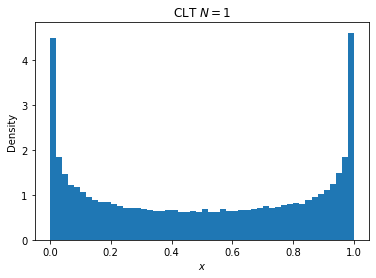

In [3]:
X = clt(dist=stats.beta.rvs, dist_params=[0.5, 0.5], n_dist=1, n_samples=100000)

plt.hist(X, bins=50, density=True)
plt.title('CLT $N=1$')
plt.xlabel('$x$')
plt.ylabel('Density')

For `n_dist=2`:

Text(0, 0.5, 'Density')

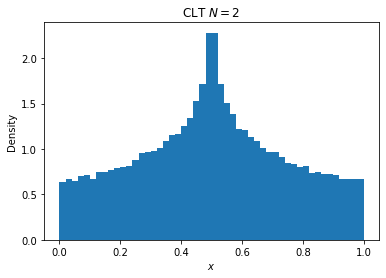

In [4]:
X = clt(dist=stats.beta.rvs, dist_params=[0.5, 0.5], n_dist=2, n_samples=100000)

plt.hist(X, bins=50, density=True)
plt.title('CLT $N=2$')
plt.xlabel('$x$')
plt.ylabel('Density')

For `n_dist=100` the resulting distribution starts to resemble a Gaussian distribution:

Text(0, 0.5, 'Density')

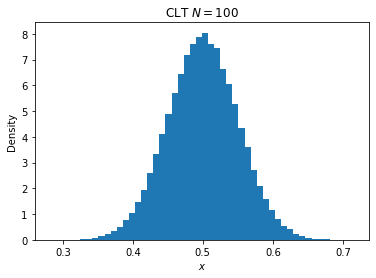

In [10]:
X = clt(dist=stats.beta.rvs, dist_params=[0.5, 0.5], n_dist=50, n_samples=100000)

plt.hist(X, bins=50, density=True)
plt.title('CLT $N=100$')
plt.xlabel('$x$')
plt.ylabel('Density')

This limiting result is valid even for mixtures of different distributions.

***

### Linear algebra operations: `scipy.linalg`

The scipy.linalg module provides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK).

To begin import the module:

In [11]:
from scipy import linalg

Let's use `linalg.det` to calculate the determinant of a matrix:

In [12]:
A = np.array([[1, 2],
              [3, 4]])

print('det(A) is {}'.format(linalg.det(A)))

det(A) is -2.0


Which is equal to what we can calculate analytically: $\det = 1 \cdot 4 - 2 \cdot 3$.

Trying to calculate a determinant for an unequal matrix results in this:

In [13]:
linalg.det(np.ones((3, 4)))

ValueError: expected square matrix

We often need to compute the inverse of a square matrix. This can be done as:

In [6]:
print('Inverse of A is \n {}'.format(linalg.inv(A)))

Inverse of A is 
 [[-2.   1. ]
 [ 1.5 -0.5]]


Check if the obtained result is correct by $A \cdot A^{-1} = \mathrm{I}$:

In [14]:
close_enough = np.allclose(np.dot(A, linalg.inv(A)), np.eye(2))
print('A * A^-1 = I ', close_enough)

A * A^-1 = I  True


Finally computing the inverse of a singular matrix (its determinant is zero) will raise LinAlgError:

In [15]:
arr = np.array([[3, 2],
                [6, 4]])

linalg.inv(arr)  

LinAlgError: singular matrix

More advanced operations are available, for example singular-value decomposition (SVD):

In [16]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])

print(arr)

[[1 1 2]
 [3 4 5]
 [6 7 9]]


In [17]:
uarr, spec, vharr = linalg.svd(arr)

The resulting array spectrum is:

In [18]:
spec

array([14.88982544,  0.45294236,  0.29654967])

In [19]:
uarr

array([[-0.1617463 , -0.98659196,  0.02178164],
       [-0.47456365,  0.09711667,  0.87484724],
       [-0.86523261,  0.13116653, -0.48390895]])

In [20]:
vharr

array([[-0.45513179, -0.54511245, -0.70406496],
       [ 0.20258033,  0.70658087, -0.67801525],
       [-0.86707339,  0.45121601,  0.21115836]])

The original matrix can be re-composed by matrix multiplication of the outputs of svd with np.dot:

In [21]:
sarr = np.diag(spec)

svd_mat = uarr.dot(sarr).dot(vharr)

np.allclose(svd_mat, arr)

True

SVD is commonly used in statistics and signal processing. Many other standard decompositions (QR, LU, Cholesky, Schur), as well as solvers for linear systems, are available in scipy.linalg.

Interpolation: scipy.interpolate

scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists. The module is based on the FITPACK Fortran subroutines.

By imagining experimental data close to a sine function:

In [51]:
measured_time = np.linspace(0, 1, 1000)

noise = (np.random.random(1000)*2 - 1) * 5e-1

measures = np.sin(2 * np.pi * measured_time) + noise

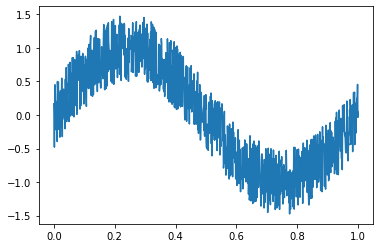

In [52]:
import matplotlib.pyplot as plt

plt.plot(measured_time, measures, '-')

scipy.interpolate.interp1d can build a linear interpolation function:

In [53]:
from scipy.interpolate import interp1d

In [54]:
linear_interp = interp1d(measured_time, measures)

In [55]:
linear_interp

Then the result can be evaluated at the time of interest:

In [56]:
interpolation_time = np.linspace(0, 1, 50)

linear_results = linear_interp(interpolation_time)

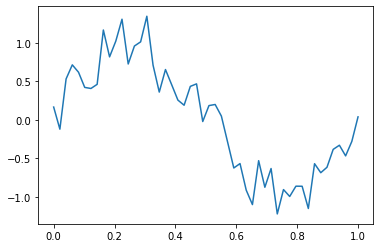

In [57]:
plt.plot(interpolation_time, linear_results)

A cubic interpolation can also be selected by providing the kind optional keyword argument:

In [58]:
cubic_interp = interp1d(measured_time, measures, kind='quadratic')

cubic_results = cubic_interp(interpolation_time)

In [43]:
interp1d?

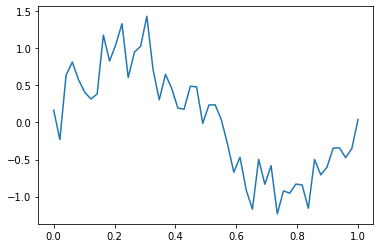

In [59]:
plt.plot(interpolation_time, cubic_results)

scipy.interpolate.interp2d is similar to scipy.interpolate.interp1d, but for 2-D arrays. Note that for the interp family, the interpolation points must stay within the range of given data points. See the summary exercise on Maximum wind speed prediction at the Sprogø station for a more advanced spline interpolation example.

Finding the minimum of a scalar function

In [60]:
from scipy import optimize

In [65]:
def f(x):
    return x**2 + 20*np.sin(x)

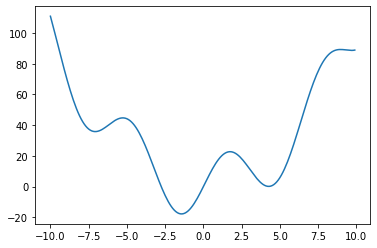

In [66]:
x = np.arange(-10, 10, 0.1)

plt.plot(x, f(x)) 
plt.show() 

This function has a global minimum around -1.3 and a local minimum around 3.8.

Searching for minimum can be done with scipy.optimize.minimize(), given a starting point x0, it returns the location of the minimum that it has found:

The result of scipy.optimize.minimize() is a compound object comprising all information on the convergence

In [82]:
result = optimize.minimize(f, x0=-10)

result 

      fun: -17.757256531474148
 hess_inv: array([[0.04589932]])
      jac: array([-2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 4
     njev: 10
   status: 0
  success: True
        x: array([-1.4275518])

In [83]:
optimize.minimize?

In [29]:
result.x

array([-1.30644012])

Methods: As the function is a smooth function, gradient-descent based methods are good options. The lBFGS algorithm is a good choice in general:

In [87]:
optimize.minimize(f, x0=-10, method="L-BFGS-B")

      fun: array([-17.75725653])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 22
      nit: 5
     njev: 11
   status: 0
  success: True
        x: array([-1.42755178])

Global minimum: A possible issue with this approach is that, if the function has local minima, the algorithm may find these local minima instead of the global minimum depending on the initial point x0:

In [31]:
res = optimize.minimize(f, x0=3, method="L-BFGS-B")

res.x

array([3.83746709])

If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort to costlier global optimization. To find the global minimum, we use scipy.optimize.basinhopping() (added in version 0.12.0 of Scipy). It combines a local optimizer with sampling of starting points:

In [91]:
optimize.basinhopping(f, 7.5)

                        fun: 0.15825752683178962
 lowest_optimization_result:       fun: 0.15825752683178962
 hess_inv: array([[0.04977326]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([4.27109533])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1120
                        nit: 100
                       njev: 560
                          x: array([4.27109533])

Finding the roots of a scalar function

To find a root, i.e. a point where f(x) = 0, of the function f above we can use scipy.optimize.root():

In [93]:
root = optimize.root(f, x0=-10)  # our initial guess is 1

root    # The full result

    fjac: array([[-1.]])
     fun: array([35.82274458])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 23
     qtf: array([-35.82274458])
       r: array([0.00702161])
  status: 5
 success: False
       x: array([-7.06785375])

In [34]:
root.x  # Only the root found

array([0.])

Note that only one root is found. Inspecting the plot of f reveals that there is a second root around -2.5. We find the exact value of it by adjusting our initial guess:

In [35]:
root2 = optimize.root(f, x0=-2.5)

root2.x

array([-2.47948183])

Function integrals

The most generic integration routine is scipy.integrate.quad(). To compute \int_0^{\pi / 2} sin(t) dt:

In [95]:
from scipy.integrate import quad

In [96]:
res, err = quad(np.sin, 0, np.pi/2)

np.allclose(res, 1)   # res is the result, is should be close to 1
np.allclose(err, 1 - res)  # err is an estimate of the err

True

Other integration schemes are available: scipy.integrate.fixed_quad(), scipy.integrate.quadrature(), scipy.integrate.romberg()…

The simple conjugate gradient method can be used by setting the parameter method to CG

In [97]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

In [98]:
optimize.minimize(f, [2, -1], method="CG")

     fun: 1.6503729082243953e-11
     jac: array([-6.15347610e-06,  2.53804028e-07])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 13
    njev: 27
  status: 0
 success: True
       x: array([0.99999426, 0.99998863])

Gradient methods need the Jacobian (gradient) of the function. They can compute it numerically, but will perform better if you can pass them the gradient:

In [99]:
def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [100]:
optimize.minimize(f, [2, 1], method="CG", jac=jacobian)    

     fun: 2.957865890641887e-14
     jac: array([ 7.18259502e-07, -2.99030306e-07])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 8
    njev: 16
  status: 0
 success: True
       x: array([1.00000012, 1.00000009])

Note that the function has only been evaluated 27 times, compared to 108 without the gradient.

In scipy, you can use the Newton method by setting method to Newton-CG in scipy.optimize.minimize(). Here, CG refers to the fact that an internal inversion of the Hessian is performed by conjugate gradient


In [42]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

In [43]:
def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [44]:
optimize.minimize(f, [2,-1], method="Newton-CG", jac=jacobian)

     fun: 1.5601357400786612e-15
     jac: array([ 1.05753092e-07, -7.48325277e-08])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 0
     nit: 10
    njev: 33
  status: 0
 success: True
       x: array([0.99999995, 0.99999988])

Note that compared to a conjugate gradient (above), Newton’s method has required less function evaluations, but more gradient evaluations, as it uses it to approximate the Hessian. Let’s compute the Hessian and pass it to the algorithm:

In [45]:
def hessian(x):
    return np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))

In [46]:
optimize.minimize(f, [2,-1], method="Newton-CG", jac=jacobian, hess=hessian)    

     fun: 1.6277298383706738e-15
     jac: array([ 1.11044158e-07, -7.78093352e-08])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 10
     nit: 10
    njev: 11
  status: 0
 success: True
       x: array([0.99999994, 0.99999988])

Brute force: a grid search

scipy.optimize.brute() evaluates the function on a given grid of parameters and returns the parameters corresponding to the minimum value. The parameters are specified with ranges given to numpy.mgrid. By default, 20 steps are taken in each direction:

In [47]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

In [48]:
optimize.brute(f, ((-1, 2), (-1, 2)))

array([1.00001462, 1.00001547])